In [1]:
!pip install import-ipynb

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import import_ipynb

In [6]:
import funcoes

In [74]:
dados = pd.read_csv('titles.csv')
filmes = dados.loc[dados.type=='MOVIE']
filmes.tmdb_popularity.describe()
# A target escolhida para avaliar quais filmes apresentam maior satisfação dos usuários foi a popularidade de acordo com o tmdb. Esta
# varia de 0.009442 a 2274.044000, pode-se observar que 50% da popularidade dos filmes na Netflix está abaixo de 5, mas a média é 20, 
#logo a popularidade de alguns filmes difere muito da maioria e sobe a média demais em relação a todos 

count    3682.000000
mean       20.314546
std        78.066405
min         0.009442
25%         2.509250
50%         5.862000
75%        14.657250
max      2274.044000
Name: tmdb_popularity, dtype: float64

In [75]:

# Primeiro filtramos nossa base para avaliar somente os filmes:
filmes = dados.loc[dados.type=='MOVIE']
filmes.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.300
11,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,"['western', 'action', 'european']",['US'],NaN,tt0060862,7.3,16446.0,13.123,7.100


In [76]:
#maior_80 = dados.loc[dados['tmdb_popularity']>80]
#maior_80['genres'].value_counts()
generos_frequentes = 
#comedia, drama, romance, ação, fantasia, horror

SyntaxError: invalid syntax (Temp/ipykernel_44708/106401328.py, line 3)

In [77]:
#Para as variáveis quantitativas com valores que fogem muito da média pode ser feito a elimição dos valores
#extremos a partir dos cálculos de limite superior e inferior
#que são LS: Q3 + 1,5 IQ e LI: Q1 - 1,5 IQ, sendo IQ= Q3 - Q1

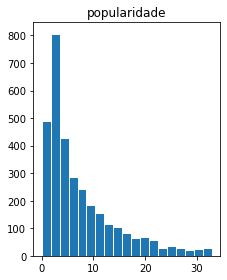

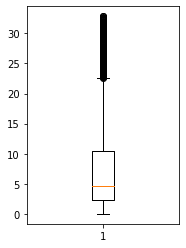

In [85]:
filmes= dados.loc[(dados.type == 'MOVIE'), :]

def valores_extremos(dados, vari):
    dados= dados[vari]
    Qter= dados.quantile(0.75)
    Qpri= dados.quantile(0.25)
    iq= Qter - Qpri
    LS = Qter + 1.5*iq
    LI= Qpri - 1.5*iq
    return(dados.loc[(dados>LI)&(dados<LS)])

pop = valores_extremos(filmes, 'tmdb_popularity')

faixa_pop= np.linspace(pop.min(), pop.max(), 20)


plt.subplot(121) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 3
plt.hist(pop, faixa_pop, edgecolor='white')
plt.title("popularidade")

plt.tight_layout()
plt.show()

plt.subplot(122)
plt.boxplot(pop)
plt.show()

In [13]:
nota_imdb= filmes.imdb_score
nota_tmdb= filmes.tmdb_score
duracao= filmes.runtime
votos_imdb= filmes.imdb_votes
lancamento= filmes.release_year
popularidade= filmes.tmdb_popularity

In [34]:
#para analidar a frequêncidas dos dados, fizemos um histograma de cada uma das variáveis quantitativas

faixa_popularidade= np.linspace(popularidade.min(), popularidade.max(), 30)
faixa_nota_imdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)
faixa_nota_tmdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)


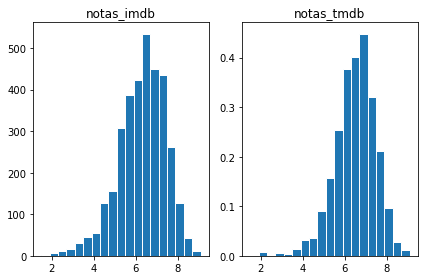

0.6935424516543471


In [43]:
plt.subplot(121) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 3
plt.hist(nota_imdb, faixa_nota_imdb, edgecolor='white')
plt.title("notas_imdb")


plt.subplot(122) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 4
plt.hist(nota_tmdb,faixa_nota_tmdb , edgecolor='white', density=True)
plt.title("notas_tmdb")


plt.tight_layout()
plt.show()
print(nota_tmdb.cov(nota_imdb))

In [14]:
#observando as variáveis quantitativas que temos pra analisar, foi feito um describe de cada uma, para entender como ela se comporta
nota_imdb.describe()

count    3429.000000
mean        6.246748
std         1.127486
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.100000
Name: imdb_score, dtype: float64

In [15]:
nota_tmdb.describe()

count    3549.000000
mean        6.464012
std         1.043817
min         1.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: tmdb_score, dtype: float64

In [ ]:
#notas são valores que giram de 0 a 10, nesse caso, e logo, não tem desvio padrão muito alto,
#então não têm valores que fogem absurdo da grande maioria,
#sendo assim, sem eliminar valores absurdos, é possível fazer um histograma

In [16]:
duracao.describe()

count    3744.000000
mean       98.213675
std        30.640640
min         2.000000
25%        85.000000
50%        98.000000
75%       115.000000
max       240.000000
Name: runtime, dtype: float64

In [17]:
votos_imdb.describe() 
#o desvio padrão dos valores dos votos é muito alto 

count    3.413000e+03
mean     2.690938e+04
std      1.068378e+05
min      5.000000e+00
25%      5.600000e+02
50%      2.591000e+03
75%      1.154500e+04
max      2.294231e+06
Name: imdb_votes, dtype: float64

In [18]:
lancamento.describe()

count    3744.000000
mean     2015.870994
std         7.622202
min      1954.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

In [22]:
#Em seguida fizemos a covariância da popularidade com essas variáveis
#A covariância é um cálculo estatístico que torna possível a comparação de dois grupos de dados e, dessa forma, entender como eles se relacionam entre si
#Percebendo alguma covariância alta entre as variáveis é possível entender melhor o que influencia cada coisa
print('Covariância entre popularidade e nota_imdb é {0:.2f}'.format(popularidade.cov(nota_imdb)))
print('Covariância entre popularidade e nota_tmdb é {0:.2f}'.format(popularidade.cov(nota_tmdb)))
print('Covariância entre popularidade e duracao é {0:.2f}'.format(popularidade.cov(duracao)))
print('Covariância entre popularidade e votos_imdb é {0:.2f}'.format(popularidade.cov(votos_imdb)))
print('Covariância entre popularidade e ano de lançamento é {0:.2f}'.format(popularidade.cov(lancamento)))

Covariância entre popularidade e nota_imdb é -3.86
Covariância entre popularidade e nota_tmdb é 3.50
Covariância entre popularidade e duracao é 91.53
Covariância entre popularidade e votos_imdb é 767201.20
Covariância entre popularidade e ano de lançamento é 46.09


In [38]:
#Um erro que pode ocorrer é que não percebemos a relação de um dado com outro por conta influencia de outro dado sobre este, logo fizemos a covariância dos outros dados entre si
#o que relacionar?

Correlação entre tmdb_popularity e imdb_score é -0.04
Correlação entre tmdb_popularity e tmdb_score é 0.04
Correlação entre tmdb_popularity e runtime é 0.04
Correlação entre tmdb_popularity e release_year é 0.08
Correlação entre tmdb_popularity e imdb_votes é 0.09


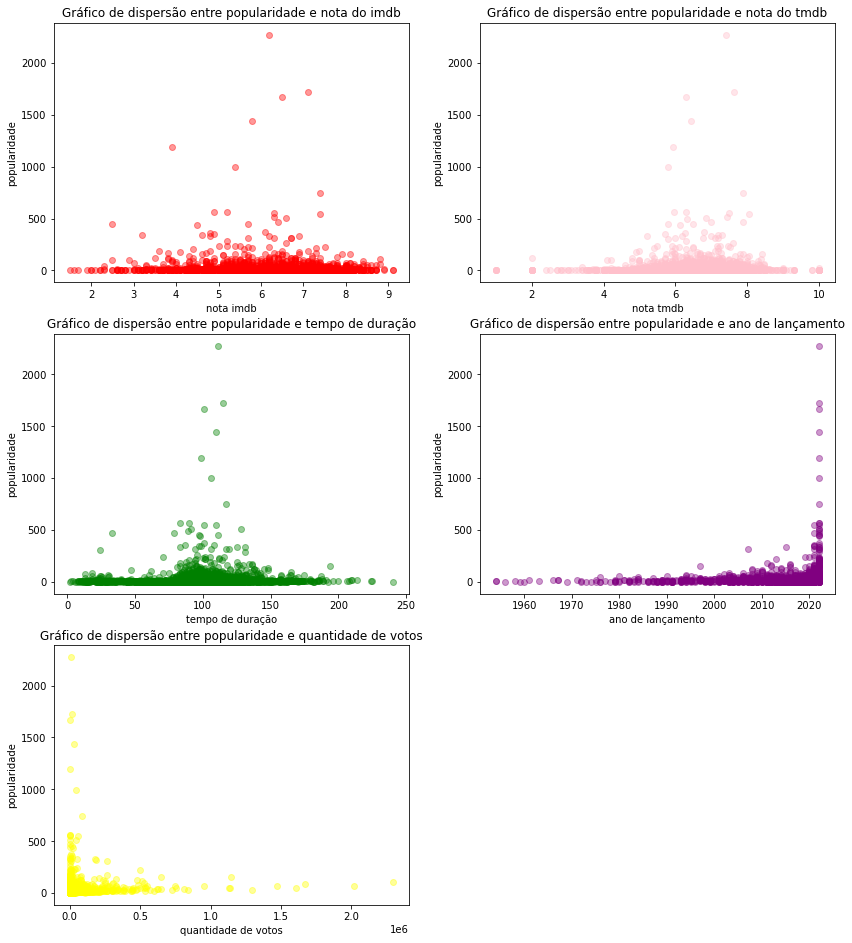

In [39]:
#Em seguida relacionamos a popularidade com cada variável quantitativa do dataframe para ver se havia alguma relação:
fig = plt.figure(figsize=(14, 14))
plt.subplot(321)
plt.scatter(filmes.imdb_score, filmes.tmdb_popularity, color='red', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e nota do imdb')
plt.xlabel('nota imdb')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e imdb_score é {0:.2f}'.format(filmes.tmdb_popularity.corr(filmes.imdb_score)))

plt.subplot(322)
plt.scatter( filmes.tmdb_score, filmes.tmdb_popularity, color='pink', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e nota do tmdb')
plt.xlabel('nota tmdb')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e tmdb_score é {0:.2f}'.format(filmes.tmdb_popularity.corr(filmes.tmdb_score)))

plt.subplot(323)
plt.scatter( filmes.runtime,filmes.tmdb_popularity, color='green', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e tempo de duração')
plt.xlabel('tempo de duração')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e runtime é {0:.2f}'.format(filmes.tmdb_popularity.corr(filmes.runtime)))

plt.subplot(324)
plt.scatter( filmes.release_year, filmes.tmdb_popularity, color='purple', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e ano de lançamento')
plt.xlabel('ano de lançamento')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e release_year é {0:.2f}'.format(filmes.tmdb_popularity.corr(filmes.release_year)))

plt.subplot(325)
plt.scatter(filmes.imdb_votes,filmes.tmdb_popularity, color='yellow', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e quantidade de votos')
plt.xlabel('quantidade de votos')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e imdb_votes é {0:.2f}'.format(filmes.tmdb_popularity.corr(filmes.imdb_votes)))



In [ ]:
#depois selecionamos os gêneros mais comuns e aplicamos na 